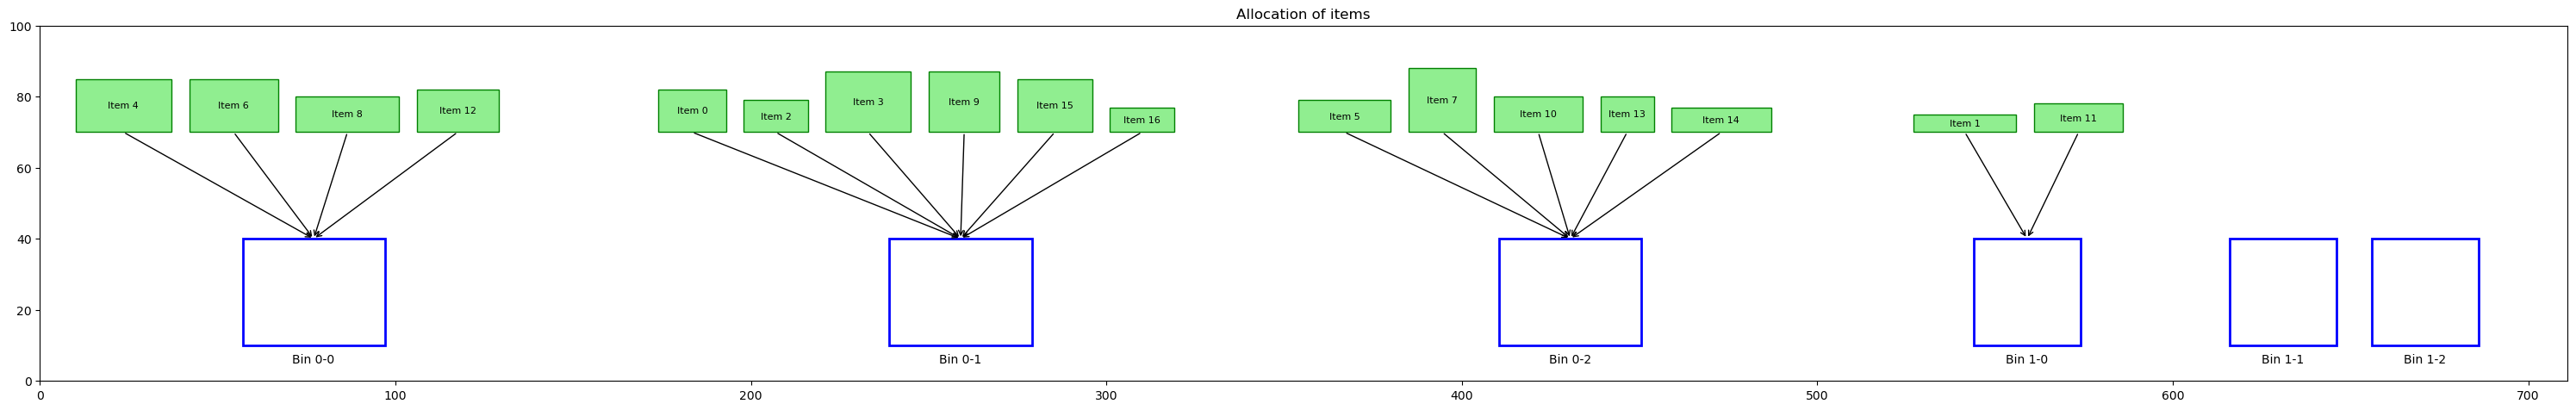

In [55]:
import matplotlib.pyplot as plt
import numpy as np

X = [
    [19, 29, 12],
    [29, 24,  5],
    [18, 28,  9],
    [24, 20, 17],
    [27, 27, 15],
    [26, 22,  9],
    [25, 23, 15],
    [19, 21, 18],
    [29, 28, 10],
    [20, 24, 17],
    [25, 27, 10],
    [25, 20,  8],
    [23, 26, 12],
    [15, 27, 10],
    [28, 21,  7],
    [21, 22, 15],
    [18, 27,  7],
    [40, 40, 30],
    [30, 30, 30]]

E=  [
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 0], [1, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 0], [1, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0, 0]],
[[0, 1, 0], [0, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], 0, 0],
[[0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], 0, 0]]

nb=2
na=len(X)-nb

# Extract item-bin relationship
item_to_bin={}

for i in range(na):
    for j in range(na,na+nb):
        if isinstance(E[i][j],list):
            for k in range(len(E[i][j])):
                if E[i][j][k]==1:
                    item_to_bin.setdefault((j,k),[]).append(i)

# List of all bins
bin_blocks=[]
for j in range(na, na+nb):
    if isinstance(E[0][j],list):
        for k in range(len(E[0][j])):
            bin_blocks.append((j,k))

# Plot
fig, ax=plt.subplots(figsize=(len(bin_blocks)*5,8))
ax.set_title('Allocation of items')

x_cursor=10


for (j,k) in bin_blocks:
    item_indices=item_to_bin.get((j,k), [])
    bin_dims=X[j]
    W, H, D=bin_dims

    # Compute center of item group
    item_x=x_cursor
    items_gap=10
    item_positions=[]
    for idx in item_indices:
        item_w=X[idx][0]
        item_positions.append((item_x, item_w))
        item_x+=item_w+items_gap

    if item_positions:
        group_start=item_positions[0][0]
        group_end=item_positions[-1][0]+item_positions[-1][1]
        item_group_center=(group_start+group_end)/2
    else:
        item_group_center=x_cursor

    W, H, D=X[j]
    bin_x=item_group_center-W/2
    bin_y=10

    ax.add_patch(plt.Rectangle((bin_x,bin_y), W, D,
                               edgecolor='blue', linewidth=2, facecolor='none'))
    ax.text(bin_x+W/2, bin_y-5, f'Bin {j-na}-{k}', ha='center', fontsize=10)

    # Draw items above the bin
    item_y=bin_y+D+30
    item_x = x_cursor
    for idx in item_indices:
        item_w, _, item_d=X[idx]
        ax.add_patch(plt.Rectangle((item_x, item_y), item_w, item_d,
                                   edgecolor='green',facecolor='lightgreen', linewidth=1))
        ax.text(item_x+item_w/2, item_y+item_d/2, f'Item {idx}', ha='center', va='center',fontsize=8)

        ax.annotate('', 
                    xy=(bin_x+W/2, bin_y+D), 
                    xytext=(item_x+item_w/2,item_y),
                    arrowprops=dict(arrowstyle='->',color='black'))
        
        item_x+=item_w+5
    
    x_cursor+=max(W,2*(item_x-bin_x))+10

ax.set_xlim(0, x_cursor)
ax.set_ylim(0,100)
ax.set_aspect('equal')
ax.axis('on')
plt.tight_layout()
plt.show()